# Rosenbrock function
## f(x,y) = 100*(y-x^2)^2+(1-x)^2

In [141]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import optimize

In [142]:
def rozenbrok(param):
    x,y = param
    return 100*(y-x*x)*(y-x*x)+(1-x)*(1-x)

In [143]:
X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))

In [144]:
data = X, Y

In [145]:
Z = rozenbrok(data)

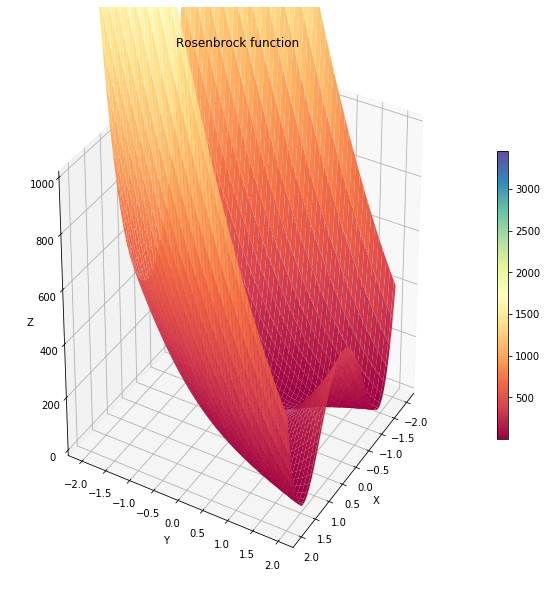

In [146]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.view_init(elev=30, azim=30)
ax.set_zlim(0, 1000)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock function')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.get_cmap('Spectral',100), antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=25)
plt.show()

In [147]:
opt = optimize.minimize(rozenbrok, [-2,2], method="CG")

In [148]:
def rozenbrok_invert(param):
    x,y = param
    return -100*(y-x*x)*(y-x*x)+(1-x)*(1-x)

In [149]:
Z_invert = rozenbrok_invert(data)

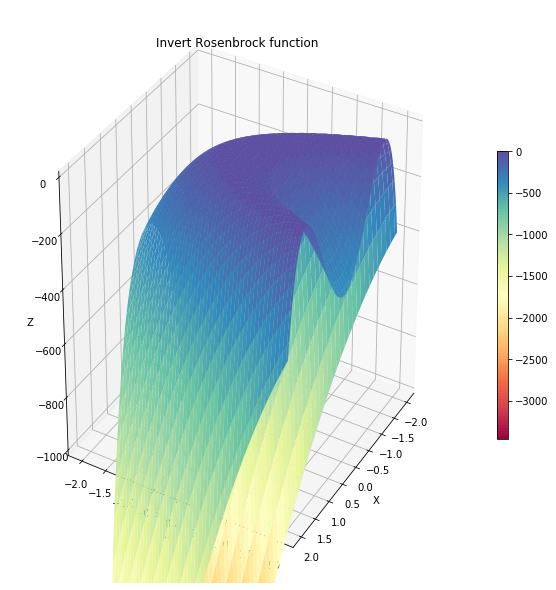

In [150]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.view_init(elev=30, azim=30)
ax.set_zlim(-1000, 0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Invert Rosenbrock function')
surf = ax.plot_surface(X, Y, Z_invert, cmap=plt.cm.get_cmap('Spectral',100), antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=25)
plt.show()

In [151]:
opt_invert = optimize.minimize(rozenbrok_invert, [-2,2], method="CG")

In [152]:
# Задача поиска максимум функции Розенброка не имеет смысла, тк из графика видно, 
# что функция устремляется в бесконечность.
# Оптимизационный метод показывает значение максимума: 

In [153]:
abs(opt_invert.fun)

1.5113213029895964e+36

In [154]:
# при значении аргументов функции x и y соответственно:

In [155]:
opt_invert.x

array([-3.50622031e+08, -8.79854519e+07])

In [156]:
# Нахождение минимума же рассматриваемой функции смысл имеет. 
# Минимум достигается при значении функции

In [157]:
opt.fun

1.334011570338723e-11

In [158]:
# при значении аргументов функции x и y соответственно:

In [159]:
opt.x

array([0.99999635, 0.99999269])

In [160]:
# те min(f(x)) = 0 при x,y = (1,1)

In [161]:
import pandas as pd

In [162]:
df = pd.DataFrame(Z)

In [163]:
# Нормирование относительно среднего

In [164]:
df_norm = (df - df.mean()) / (df.max() - df.min())

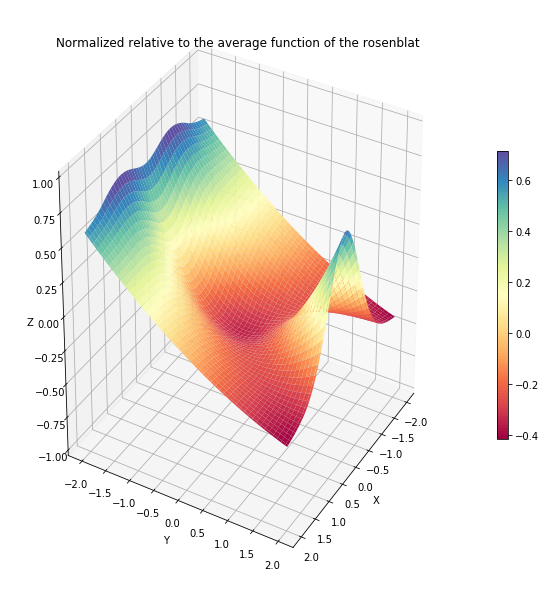

In [165]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.view_init(elev=30, azim=30)
ax.set_zlim(-1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Normalized relative to the average function of the rosenblat')
surf = ax.plot_surface(X, Y, df_norm, cmap=plt.cm.get_cmap('Spectral',100), antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=25)
plt.show()